#### Predicting Cotton Disease

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import pandas as pd

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/data_leaf/train'

test_path = '/content/drive/MyDrive/Datasets/data_leaf/test'

In [ ]:
res = ResNet50(include_top=False, input_shape=IMAGE_SIZE+[3])

In [ ]:
for layers in res.layers:
  layers.trainable = False

In [ ]:
folders = glob(train_path + '/*')

folders

['/content/drive/MyDrive/Datasets/data_leaf/train/fresh cotton plant',
 '/content/drive/MyDrive/Datasets/data_leaf/train/fresh cotton leaf',
 '/content/drive/MyDrive/Datasets/data_leaf/train/diseased cotton leaf',
 '/content/drive/MyDrive/Datasets/data_leaf/train/diseased cotton plant']

In [ ]:
x = Flatten()(res.output)

In [ ]:
predictions = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(inputs = res.inputs, outputs = predictions)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
### Image Data Generator

##Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(train_path, target_size = (224, 224))

test_data = test_datagen.flow_from_directory(test_path, target_size = (224, 224))

Found 1967 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience = 5)

In [ ]:
model.fit(train_data, validation_data=test_data, batch_size=32, epochs=100, verbose =1, callbacks=[early_stop])

Epoch 1/100
62/62 [==============================] - 77s 617ms/step - loss: 2.8365 - accuracy: 0.4235 - val_loss: 1.1741 - val_accuracy: 0.5000
Epoch 2/100
62/62 [==============================] - 35s 561ms/step - loss: 1.0365 - accuracy: 0.5801 - val_loss: 1.1799 - val_accuracy: 0.6111
Epoch 3/100
62/62 [==============================] - 35s 560ms/step - loss: 1.0648 - accuracy: 0.5745 - val_loss: 1.6590 - val_accuracy: 0.6111
Epoch 4/100
62/62 [==============================] - 35s 561ms/step - loss: 0.9198 - accuracy: 0.6238 - val_loss: 0.7836 - val_accuracy: 0.6667
Epoch 5/100
62/62 [==============================] - 35s 560ms/step - loss: 0.9114 - accuracy: 0.6446 - val_loss: 1.2103 - val_accuracy: 0.5556
Epoch 6/100
62/62 [==============================] - 35s 559ms/step - loss: 0.8510 - accuracy: 0.6655 - val_loss: 0.8564 - val_accuracy: 0.7778
Epoch 7/100
62/62 [==============================] - 35s 559ms/step - loss: 0.7143 - accuracy: 0.7133 - val_loss: 1.0612 - val_accuracy:

In [ ]:
loss = pd.DataFrame(model.history.history)

loss

,loss,accuracy,val_loss,val_accuracy
0,2.836477,0.423488,1.174095,0.500000
1,1.036458,0.580071,1.179871,0.611111
2,1.064763,0.574479,1.659025,0.611111
3,0.919839,0.623793,0.783621,0.666667
4,0.911374,0.644637,1.210308,0.555556
5,0.851005,0.665480,0.856368,0.777778
6,0.714339,0.713269,1.061157,0.500000
7,0.893832,0.678190,0.642273,0.722222
8,0.746264,0.704118,0.958863,0.611111
9,0.878196,0.687341,1.200688,0.777778


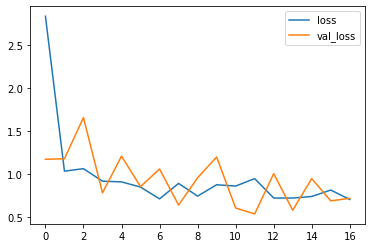

In [ ]:
loss [['loss', 'val_loss']].plot()

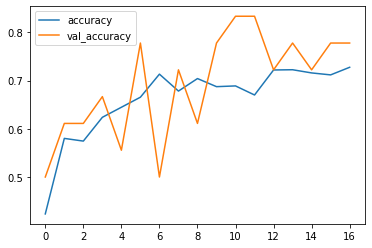

In [ ]:
loss [['accuracy', 'val_accuracy']].plot()

In [ ]:
test_pred = model.predict(test_data)
test_pred_cat = np.argmax(test_pred, axis=1)

In [ ]:
print(classification_report(test_data.labels, test_pred_cat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.17      0.20      0.18         5
           2       0.17      0.20      0.18         5
           3       0.00      0.00      0.00         5

    accuracy                           0.11        18
   macro avg       0.08      0.10      0.09        18
weighted avg       0.09      0.11      0.10        18



### Inception V3


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
incep = InceptionV3(include_top=False, weights='imagenet', input_shape=IMAGE_SIZE+[3])

In [ ]:
for layers in incep.layers:
  layers.trainable = False

In [ ]:
x = Flatten()(incep.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
model = Model(incep.input, prediction)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [ ]:
model.fit(train_data, epochs=100, validation_data=(test_data), verbose=1, callbacks=[early_stop])

Epoch 1/100
62/62 [==============================] - 44s 644ms/step - loss: 2.2464 - accuracy: 0.7351 - val_loss: 0.0504 - val_accuracy: 1.0000
Epoch 2/100
62/62 [==============================] - 35s 563ms/step - loss: 0.6231 - accuracy: 0.8958 - val_loss: 0.2616 - val_accuracy: 0.8889
Epoch 3/100
62/62 [==============================] - 35s 569ms/step - loss: 0.8401 - accuracy: 0.8658 - val_loss: 0.7062 - val_accuracy: 0.8333
Epoch 4/100
62/62 [==============================] - 37s 589ms/step - loss: 0.7013 - accuracy: 0.9095 - val_loss: 0.1147 - val_accuracy: 0.9444
Epoch 5/100
62/62 [==============================] - 36s 573ms/step - loss: 0.8576 - accuracy: 0.9085 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/100
62/62 [==============================] - 35s 567ms/step - loss: 0.9592 - accuracy: 0.9049 - val_loss: 0.2336 - val_accuracy: 0.9444
Epoch 7/100
62/62 [==============================] - 35s 564ms/step - loss: 0.5672 - accuracy: 0.9314 - val_loss: 0.8135 - val_accuracy:

In [ ]:
loss = pd.DataFrame(model.history.history)

loss

,loss,accuracy,val_loss,val_accuracy
0,2.246417,0.735130,0.050425,1.000000
1,0.623079,0.895780,0.261581,0.888889
2,0.840113,0.865785,0.706165,0.833333
3,0.701330,0.909507,0.114667,0.944444
4,0.857552,0.908490,0.001410,1.000000
5,0.959167,0.904931,0.233624,0.944444
6,0.567174,0.931368,0.813543,0.888889
7,0.447233,0.946619,0.050447,0.944444
8,0.367185,0.954753,0.673851,0.888889
9,0.361316,0.943569,0.018523,1.000000


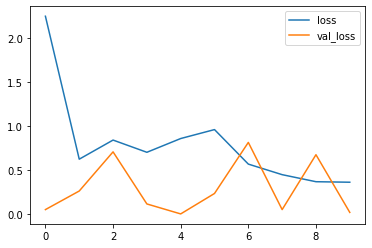

In [ ]:
loss[['loss', 'val_loss']].plot()

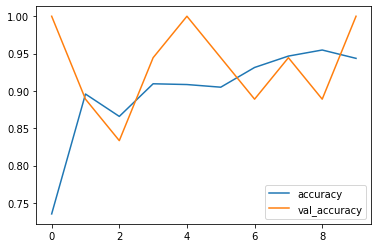

In [ ]:
loss[['accuracy', 'val_accuracy']].plot()

In [ ]:
test_pred = model.predict(test_data)
test_pred_cat = np.argmax(test_pred, axis=1)

In [ ]:
print(classification_report(test_data.labels, test_pred_cat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         5
           2       0.20      0.20      0.20         5
           3       0.20      0.20      0.20         5

    accuracy                           0.11        18
   macro avg       0.10      0.10      0.10        18
weighted avg       0.11      0.11      0.11        18



In [ ]:
test_data.labels

array([0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
test_pred_cat

array([2, 1, 3, 0, 3, 3, 0, 0, 2, 1, 3, 1, 1, 2, 2, 3, 2, 1])